# Load and explore the data set

In [3]:
# Load dataset
import pandas as pd
data = pd.read_csv('banking.csv')

# Have a quick look 
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [4]:
import numpy as np
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

After grouping, this is the columns.

In [5]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

# Explore data set 

### There are many 'unknown' value in this data frame, we should delete them

In [6]:
# Delete 'unknown' value

cat_cols = data.select_dtypes(include=object).columns.tolist()

for col in cat_cols:
    # delete each columns that has value 'unknown' 
    index_names = data[ data[col] == 'unknown' ].index 
  
    # drop these row indexes from dataFrame 
    data.drop(index_names, inplace = True) 

### Question:
We should delete 'default' because the label is super imbalance
(Let's explore later how this will effect our result)

In [5]:
data = data.drop("default", axis=1)

# Using regularization

In [6]:
# Split X and y
X = data.drop('y', axis=1).copy()
y = data['y'].copy()

In [7]:
y.value_counts()

0    26629
1     3859
Name: y, dtype: int64

In [8]:
# One-hot Encoding
cat_cols = data.select_dtypes(include=object).columns.tolist()
X_encoded = pd.get_dummies(X, columns=cat_cols)
X_encoded.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
5,30,68,8,999,0,1.4,93.918,-42.7,4.961,5228.1,...,0,0,0,0,0,1,0,0,1,0
6,37,204,1,999,0,-1.8,92.893,-46.2,1.327,5099.1,...,0,0,0,0,1,0,0,0,1,0


In [9]:
# Split training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

In [15]:
# Build Logistc Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# L1 penalty
logreg_L1 = LogisticRegression(penalty='l1', solver='liblinear')

# Create regularization hyperparameter space
C = np.logspace(0.01, 0.1, 1, 10, 100)

# Create hyperparameter options
hyperparameters = dict(C=C)

# Create grid search using 10-fold cross validation
clf = GridSearchCV(logreg_L1, hyperparameters, cv=10, verbose=0)

clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

GridSearchCV(cv=10,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.04712855])})

In [10]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(penalty='l1', solver='liblinear', C=1.04)
clf_lr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(C=1.04, penalty='l1', solver='liblinear')

In [1]:
# Define a new evalation function
def log_eva(X, y, M):
    """M means the model used"""
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
    
    pred_y = M.predict(X)
    
    # Calculate accuracy
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(M.score(X, y)))
    
    # Calculate confusion matrix
    c_mat = confusion_matrix(y, pred_y)
    print('Confusion matrix is')
    print(c_mat)
    
    # Compute precision score
    print("Precision score is:{}".format(precision_score(y, pred_y)))
    
    # Compute recall score
    print("Recall score is:{}".format(recall_score(y, pred_y)))
    
    # Compute f1 score
    print("F1 score is:{}".format(f1_score(y, pred_y)))

In [2]:
log_eva(X_test, y_test, clf_lr)

NameError: name 'X_test' is not defined

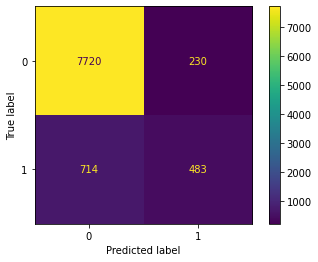

In [13]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(clf_lr, X_test, y_test)
plt.savefig("confusion_matrix_before_oversampling.png")

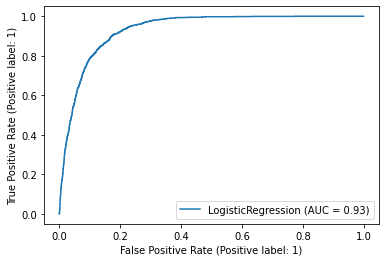

In [14]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_lr, X_test, y_test) 
plt.savefig("ROC_Curve_before_oversampling.png")

# Oversampling

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X_encode, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  37358
Number of no subscription in oversampled data 18679
Number of subscription 18679
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [11]:
# X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
X_train_new = os_data_X
y_train_new = os_data_y

In [29]:
# # Build Logistc Regression Model
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# L1 penalty
logreg_L1_after = LogisticRegression(penalty='l1', solver='liblinear')

# Create regularization hyperparameter space
C = np.logspace(0.01, 0.1, 1, 10, 100)

# Create hyperparameter options
hyperparameters = dict(C=C)

# Create grid search using 10-fold cross validation
clf = GridSearchCV(logreg_L1_after, hyperparameters, cv=10, verbose=0)

clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase th

GridSearchCV(cv=10,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.04712855])})

In [12]:
from sklearn.linear_model import LogisticRegression
clf_lr_after = LogisticRegression(penalty='l1', solver='liblinear', C=1.04)
clf_lr_after.fit(X_train_new, y_train_new)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(C=1.04, penalty='l1', solver='liblinear')

In [15]:
log_eva(X_test, y_test, clf_lr_after)

Accuracy of logistic regression classifier on test set: 0.90
Confusion matrix is
[[7711  239]
 [ 707  490]]
Precision score is:0.6721536351165981
Recall score is:0.4093567251461988
F1 score is:0.5088265835929388


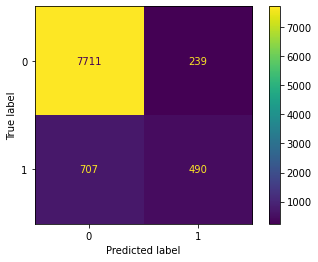

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_lr_after, X_test, y_test)
plt.savefig("LR_confusion_matrix_after.png")

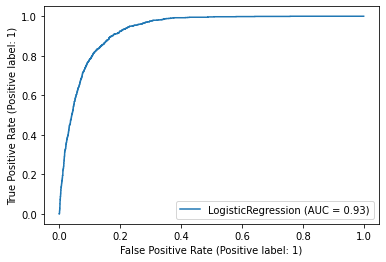

In [21]:
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_lr_after, X_test, y_test)
plt.savefig("LR_ROC_after.png")

# The End 